LINK DATASET : https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv


---


Model prediktif yang dikembangkan pada data ini diharapkan dapat memberikan panduan manajer bank untuk membuat keputusan apakah akan menyetujui pinjaman kepada calon pemohon berdasarkan profilnya.


---



Kolom target (y) adalah Creditability, bertujuan menebak apakah nasabah termasuk (1) atau tidak termasuk (0) ke kelas/kategori yang layak mendapat pinjaman berdasarkan fitur (X)

# Data Preparation

## Loading Data

In [ ]:
!gdown --id 124zGTNWltdD-q-vCtNUaVAFf_T4u5wuT

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=124zGTNWltdD-q-vCtNUaVAFf_T4u5wuT
To: /content/germanbank.csv
100% 48.2k/48.2k [00:00<00:00, 105MB/s]


In [ ]:
import pandas as pd

FILE = '/content/germanbank.csv'

# reading data, header tidak dibuang karena mengandung penjelasan kolom
df = pd.read_csv(FILE)

# tampilkan data
df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


# Visualisasi Data

## Distribusi Label

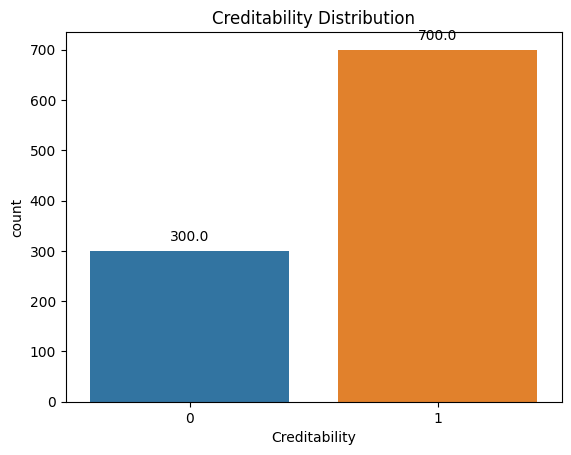

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi distribusi jenis kelamin
ax = sns.countplot(x="Creditability", data=df)
plt.title("Creditability Distribution")

# tambahkan label jumlah di atasnya
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")

plt.show()

Persebaran jumlah kelas pada distribusi kreditabilitas tidak terlalu jauh dari count yang diwakili oleh bar kedua (700). Ini menunjukkan bahwa mayoritas creditability mempunyai nilai count di sekitar nilai 700, dan tidak ada perbedaan ekstrim yang mencolok dengan grafik bar pertama (300)

## Scatter Matrix dari Features dan Labelnya

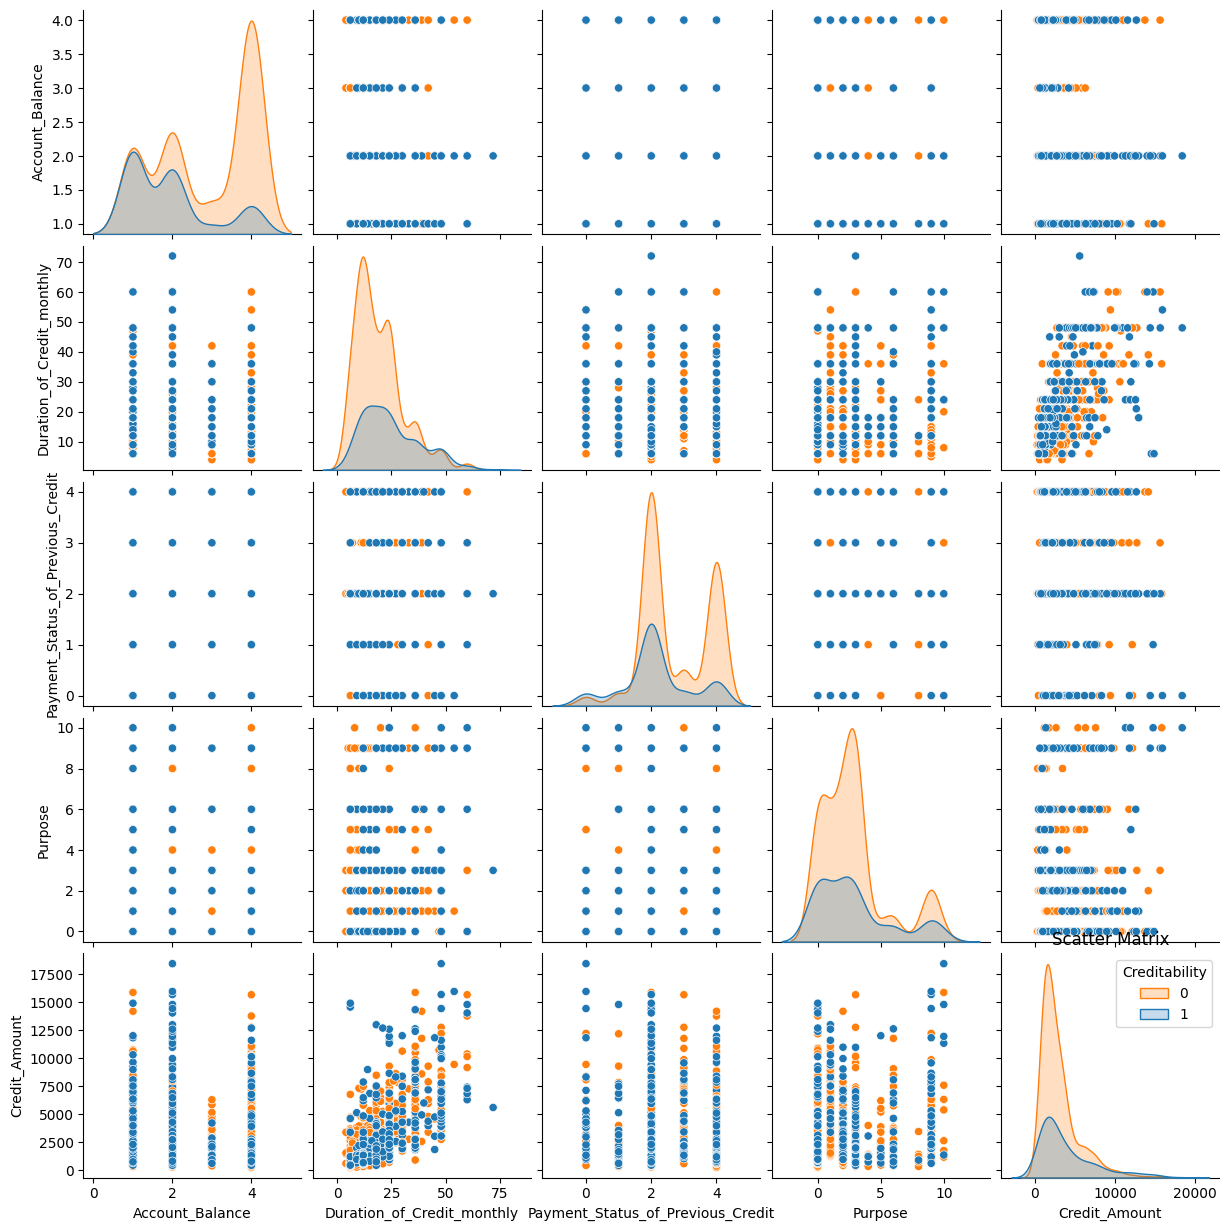

In [ ]:
# ambil 5 fitur pertama dari dataset
selected_features = df.iloc[:, :6]

# buat scatter matrixnya
g = sns.pairplot(selected_features, hue="Creditability")
g._legend.remove() # hapus legend default
plt.legend(labels=["0", "1"], title="Creditability", loc="upper right") # tambah legend baru
plt.title("Scatter Matrix")
plt.show()

Dari plot diatas menunjukkan bahwa terdapat pairing variabel antara warna biru(kredit) dan orange(tidak kredit). Selain itu warna biru(kredit) lebih banyak pairingnya sehingga banyak orang yang menggunakan creditability

In [ ]:
# Memisahkan label dan fitur sementara untuk keperluan visualisasi
X_temp = df.drop('Creditability', axis=1)
y_temp = df['Creditability']

# Melihat korelasi antar variabel pada fitur
X_corr = X_temp.corr()
X_corr

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Account_Balance,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_monthly,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_Savings_Stocks,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Length_of_current_employment,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Instalment_per_cent,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_Marital_Status,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103
Guarantors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027831,-0.105069,-0.008116,-0.011398,0.050634,1.000000,-0.025678,-0.155450,-0.029826,-0.038235,-0.065449,-0.025447,-0.057963,0.020400,-0.075035,0.140190


<Axes: >

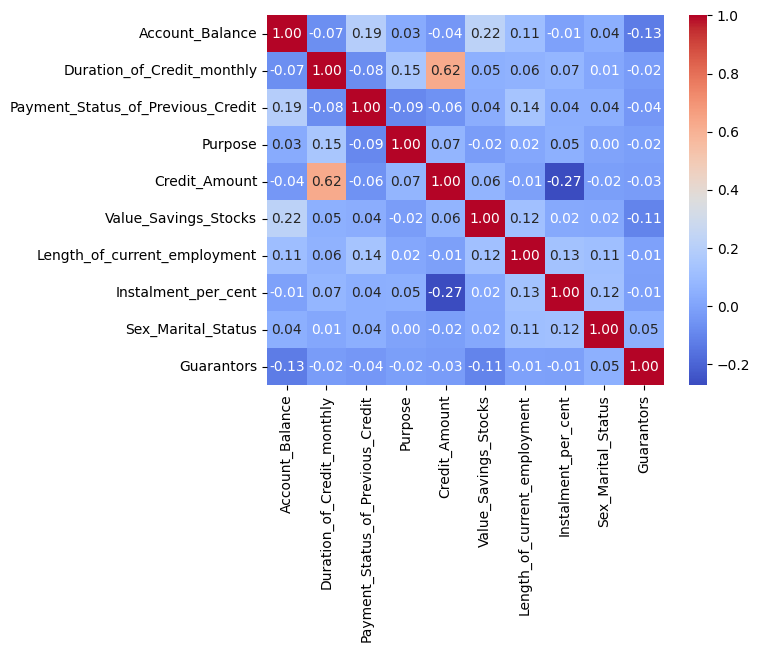

In [ ]:
# visualisasi heatmap korelasi 10 variabel bebas pertama dengan 10 fitur pertama

# library yang dibutuhkan untuk heatmap
import seaborn as sns

# pembuatan heatmap dari korelasi tadi
sns.heatmap(X_corr.iloc[:10, :10], cmap='coolwarm', annot=True, fmt='.2f')

Warna merah: Berbanding lurus
Warna biru: Berbanding terbalik

## Correlation


In [ ]:
# melihat korelasi antara fitur dengan label
X_corr_y = X_temp.corrwith(y_temp)
X_corr_y

Account_Balance                      0.350847
Duration_of_Credit_monthly          -0.214927
Payment_Status_of_Previous_Credit    0.228785
Purpose                             -0.017979
Credit_Amount                       -0.154740
Value_Savings_Stocks                 0.178943
Length_of_current_employment         0.116002
Instalment_per_cent                 -0.072404
Sex_Marital_Status                   0.088184
Guarantors                           0.025137
Duration_in_Current_address         -0.002967
Most_valuable_available_asset       -0.142612
Age_years                            0.091272
Concurrent_Credits                   0.109844
Type_of_apartment                    0.018119
No_of_Credits_at_this_Bank           0.045732
Occupation                          -0.032735
No_of_dependents                     0.003015
Telephone                            0.036466
Foreign_Worker                       0.082079
dtype: float64

### Feature Selection

In [ ]:
# urutkan fitur sesuai pengaruh terhadap label
temp_corr = pd.DataFrame(X_corr_y)
temp_corr.columns = ['nilai']

temp_corr['nilai'] = temp_corr['nilai'].abs()

temp_corr = temp_corr.sort_values('nilai')
temp_corr

,nilai
Duration_in_Current_address,0.002967
No_of_dependents,0.003015
Purpose,0.017979
Type_of_apartment,0.018119
Guarantors,0.025137
Occupation,0.032735
Telephone,0.036466
No_of_Credits_at_this_Bank,0.045732
Instalment_per_cent,0.072404
Foreign_Worker,0.082079


In [ ]:
# ambil list berisi data nama kolom terkuat korelasinya
listStrongest = []
listStrongest = temp_corr.index[-10:]
listStrongest

Index(['Sex_Marital_Status', 'Age_years', 'Concurrent_Credits',
       'Length_of_current_employment', 'Most_valuable_available_asset',
       'Credit_Amount', 'Value_Savings_Stocks', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Account_Balance'],
      dtype='object')

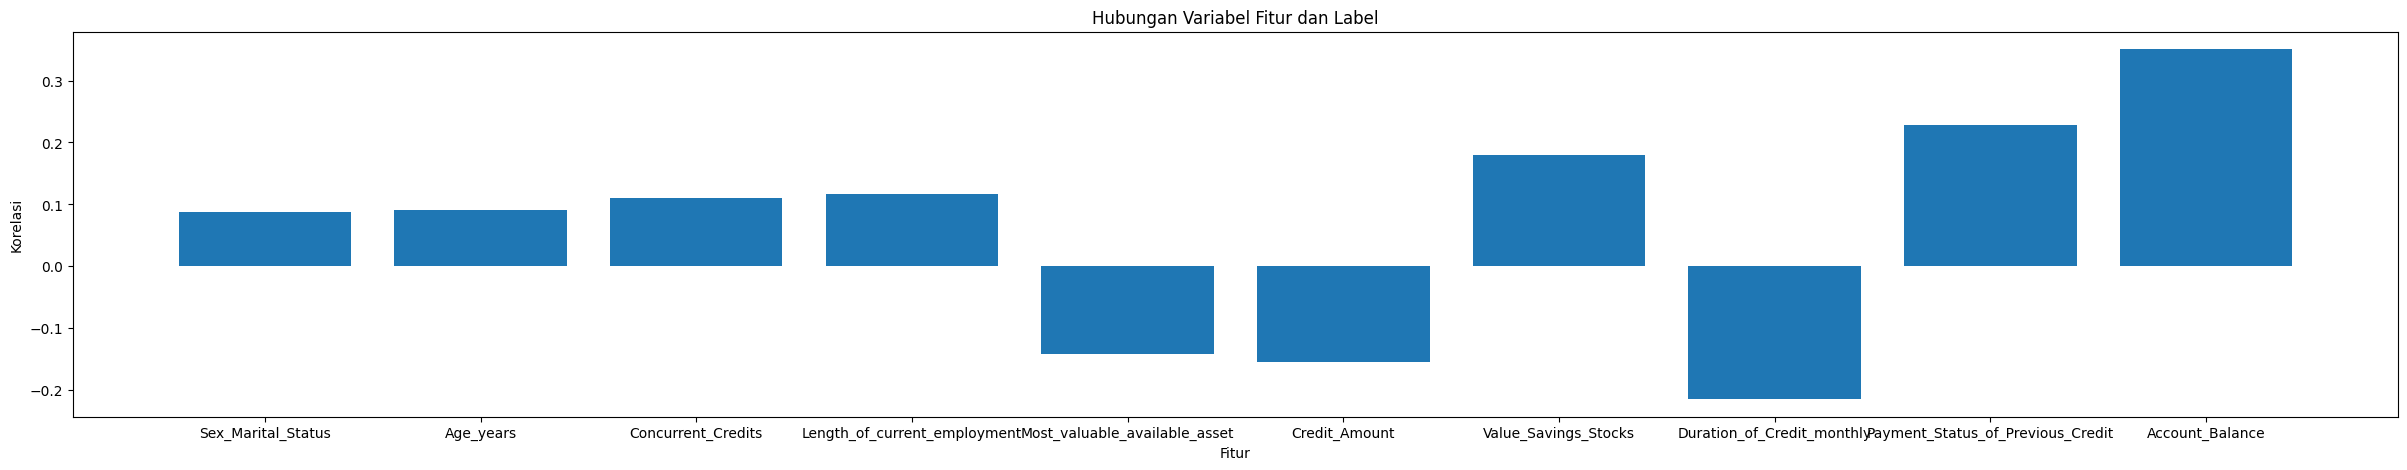

In [ ]:
# visualisasi korelasi 10 variabel bebas terkuat terhadap variabel terikat dengan bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))

# mengatur isi bar graph tadi dengan splicing
plt.bar(X_corr_y[listStrongest].index[:10], X_corr_y[listStrongest].values[:10])

# mengatur nama dari komponen x dan y grafik
plt.xlabel('Fitur')
plt.ylabel('Korelasi')

# mengatur judul grafik
plt.title('Hubungan Variabel Fitur dan Label')

# menampilkan grafik
plt.show()

# Data Preprocessing

In [ ]:
# Analisis data
df.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [ ]:
# Mencari jumlah nilai null pada tiap kolom
df.isna().sum()

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

Tidak ada label encoding karena semua data sudah bertipe numerik


---


karena tidak ada data null, maka tidak dilakukan handling missing value

## Aplikasi feature selection

In [ ]:
# urutkan fitur sesuai pengaruh terhadap label
temp_corr = pd.DataFrame(X_corr_y)
temp_corr.columns = ['nilai']

temp_corr['nilai'] = temp_corr['nilai'].abs()

temp_corr = temp_corr.sort_values('nilai')
temp_corr

,nilai
Duration_in_Current_address,0.002967
No_of_dependents,0.003015
Purpose,0.017979
Type_of_apartment,0.018119
Guarantors,0.025137
Occupation,0.032735
Telephone,0.036466
No_of_Credits_at_this_Bank,0.045732
Instalment_per_cent,0.072404
Foreign_Worker,0.082079


In [ ]:
# ambil 10 fitur yang korelasi paling lemah ke list
junk_feat = []
junk_feat = temp_corr[:10].index
junk_feat

Index(['Duration_in_Current_address', 'No_of_dependents', 'Purpose',
       'Type_of_apartment', 'Guarantors', 'Occupation', 'Telephone',
       'No_of_Credits_at_this_Bank', 'Instalment_per_cent', 'Foreign_Worker'],
      dtype='object')

In [ ]:
# memisahkan label dengan features
y = df["Creditability"]
X = df.drop("Creditability", axis=1)

In [ ]:
# Drop 10 fitur paling lemah dari X
X = X.drop(junk_feat, axis=1)
X

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits
0,1,18,4,1049,1,2,2,2,21,3
1,1,9,4,2799,1,3,3,1,36,3
2,2,12,2,841,2,4,2,1,23,3
3,1,12,4,2122,1,3,3,1,39,3
4,1,12,4,2171,1,3,3,2,38,1
...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,1987,1,3,3,1,21,3
996,1,24,2,2303,1,5,3,1,45,3
997,4,21,4,12680,5,5,3,4,30,3
998,2,12,2,6468,5,1,3,4,52,3


In [ ]:
# standarisasi data kolom fitur

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fitting scaler menggunakan data X
scaler.fit(X)

# standarisasi data X
X = scaler.transform(X)
X

array([[-1.25456565, -0.24085723,  1.34401408, ..., -0.3410551 ,
        -1.28157308,  0.46083068],
       [-1.25456565, -0.9875727 ,  1.34401408, ..., -1.29372298,
         0.04036312,  0.46083068],
       [-0.45902624, -0.73866754, -0.50342796, ..., -1.29372298,
        -1.10531492,  0.46083068],
       ...,
       [ 1.13205258,  0.00804793,  1.34401408, ...,  1.56428065,
        -0.48841136,  0.46083068],
       [-0.45902624, -0.73866754, -0.50342796, ...,  1.56428065,
         1.4504284 ,  0.46083068],
       [-1.25456565,  0.75476341, -0.50342796, ..., -0.3410551 ,
        -0.40028228,  0.46083068]])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# data splitting, dengan test-set 20% dari populasi keseluruhan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling + Evaluation (tanpa fine tuning, tembak nilai k=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# membuat classifier KNN dengan nilai default k=2
knn = KNeighborsClassifier(n_neighbors=2)

# fitting model ke train-set
knn.fit(X_train, y_train)

# prediksi dengan test-set
y_pred = knn.predict(X_test)

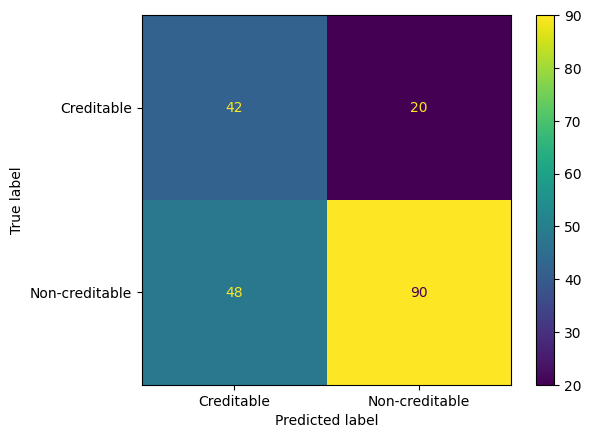

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[0, 1], display_labels=['Creditable', 'Non-creditable'])

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# evaluasi akurasinya
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 66.00%


In [ ]:
from sklearn.metrics import recall_score

# Menghitung skor recall
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.6521739130434783


In [ ]:
from sklearn.metrics import f1_score

# Menghitung f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7258064516129032


In [ ]:
from sklearn.metrics import roc_auc_score

# Menghitung skor roc-auc
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.664796633941094


# Modelling + Evaluation (dengan fine tuning lewat nilai k=1-100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def knnTuning(minK, maxK):
  best_k = 0
  best_accuracy = 0
  best_cv = 0

  for k in range(minK, maxK+1):
    # membuat classifier KNN dengan nilai default k=5
    knn = KNeighborsClassifier(n_neighbors=k)

    # fitting model ke train-set
    knn.fit(X_train, y_train)

    # prediksi dengan test-set
    y_pred = knn.predict(X_test)

    # evaluasi akurasinya
    acc = accuracy_score(y_test, y_pred)

    # Ambil nilai terbaik lewat akurasi
    if acc > best_accuracy:
      best_accuracy = acc
      best_k = k

  print('Nilai k terbaik berdasarkan akurasi: {}\n'.format(best_k))

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[0, 1], display_labels=['Creditable', 'Non-creditable'])
  plt.show()

  print("Akurasi: {:.2f}%".format(best_accuracy*100))

  # evaluasi skor recall, f1, dan roc-auc
  recall = recall_score(y_test, y_pred)
  print("Recall Score:", recall)

  f1 = f1_score(y_test, y_pred)
  print("F1 Score:", f1)

  auc_roc = roc_auc_score(y_test, y_pred)
  print("AUC-ROC Score:", auc_roc)



Nilai k terbaik berdasarkan akurasi: 7



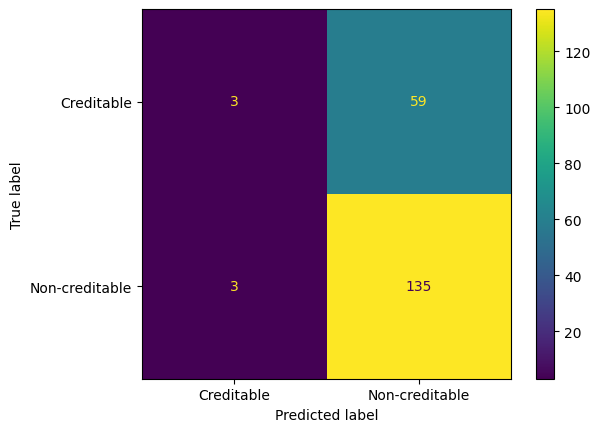

Akurasi: 80.00%
Recall Score: 0.9782608695652174
F1 Score: 0.8132530120481928
AUC-ROC Score: 0.5133239831697054


In [ ]:
# memanggil fungsi dengan nilai k 1 minimal dan 8 maksimal, dibandingkan lewat akurasi
knnTuning(1, 100)